# RUN RF model with the selected index

### 1. Call the data and split it for model process
### 2. Prepare the model, run and evaluate the model


-----------------------------------------------------------------

### 1. Call the data and split it for model process

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
my_root_dir = "/content/drive/MyDrive/Datos/GEE"
dataframe = pd.read_excel('../DataIntermediate/All_data.xlsx')
dataframe.head(382)

,b1,b2,b3,b4,b5,b6,b7,b8,NDVI,SR,...,b1_1 (Clay+Silt),b2_1(Sand_Raster),b3_1 (Silt Raster),b4_1 (Clay Raster,b8_asm,Id,SAR,CE,Tanbanca,Tabanca_Id
0,548.50,707.00,850.00,926.50,1254.0,1325.00,1664.50,2842.00,0.364127,2.145283,...,0.850000,0.150000,0.460000,0.390000,0.104167,1,26.926614,7.089333,Cafine,1
1,541.00,662.00,784.50,844.50,1083.0,967.00,1356.50,2455.50,0.439585,2.568796,...,0.519413,0.473399,0.337389,0.181547,0.104167,2,86.327645,30.558000,Cafine,1
2,491.00,623.50,765.50,818.00,1034.5,903.50,1446.50,2762.50,0.508677,3.070660,...,0.654887,0.343329,0.461192,0.192468,0.104167,3,112.754286,44.382000,Cafine,1
3,607.00,689.00,840.50,885.00,1112.5,983.00,1362.50,2370.00,0.416839,2.429589,...,0.524789,0.470715,0.431571,0.093336,0.104167,4,193.130080,93.534000,Cafine,1
4,585.50,657.00,762.00,800.50,951.5,861.00,1086.50,1832.00,0.354755,2.100475,...,0.517816,0.474641,0.407218,0.110598,0.104167,5,126.060248,60.254000,Cafine,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,974.50,703.75,1257.25,930.25,1528.5,1228.00,1406.75,2492.50,0.344621,2.075156,...,0.692295,0.310875,0.336182,0.356843,0.104167,96,23.296082,7.089333,Enchugal,3
378,794.75,445.00,946.75,534.00,1075.0,698.25,819.50,1532.00,0.360797,2.177036,...,0.508479,0.489504,0.404964,0.103152,0.105903,97,63.716873,13.406000,Enchugal,3
379,931.25,664.50,1210.50,884.75,1473.0,1163.50,1338.00,2224.75,0.313487,1.940419,...,0.605472,0.394263,0.350643,0.254651,0.104167,98,135.108655,72.286000,Enchugal,3
380,882.50,599.50,1174.50,843.50,1389.5,1079.00,1335.00,2600.00,0.413462,2.424643,...,0.508871,0.488434,0.413577,0.095293,0.104167,99,122.818091,62.814000,Enchugal,3


In [13]:
# Crear DataFrames X1 y y1
X1 = pd.DataFrame(dataframe, columns=['RNDSI','YRNDSI','NDSI','NDWI','GNDVI', 'GCVI', 'GRVI' ,'YRNDVI' ,'NDVI', 'SAVI' ,'RNDVI', 'b1_1 (Clay+Silt)',	'b2_1(Sand_Raster)',	'b3_1 (Silt Raster)',	'b4_1 (Clay Raster']).dropna() # 'b1_1','b2_1','b3_1', 'b4_1'
y1 = pd.DataFrame(dataframe[["CE"]]).dropna()


X1.head()

,RNDSI,YRNDSI,NDSI,NDWI,GNDVI,GCVI,GRVI,YRNDVI,NDVI,SAVI,RNDVI,b1_1 (Clay+Silt),b2_1(Sand_Raster),b3_1 (Silt Raster),b4_1 (Clay Raster
0,-0.257474,-0.386275,-0.364127,-0.538803,0.538803,2.336546,3.336546,0.386275,0.364127,0.242722,0.257474,0.850000,0.150000,0.460000,0.390000
1,-0.288211,-0.391789,-0.439585,-0.513050,0.513050,2.107235,3.107235,0.391789,0.439585,0.293014,0.288211,0.519413,0.473399,0.337389,0.181547
2,-0.314288,-0.453342,-0.508677,-0.562505,0.562505,2.571547,3.571547,0.453342,0.508677,0.339072,0.314288,0.654887,0.343329,0.461192,0.192468
3,-0.265498,-0.365170,-0.416839,-0.473273,0.473273,1.797036,2.797036,0.365170,0.416839,0.277851,0.265498,0.524789,0.470715,0.431571,0.093336
4,-0.261639,-0.318139,-0.354755,-0.402379,0.402379,1.346602,2.346602,0.318139,0.354755,0.236459,0.261639,0.517816,0.474641,0.407218,0.110598


In [14]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state= 71) 

pd.DataFrame(y_train).head(200)
# print(y_train)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (305, 15)
X_test: (77, 15)
y_train: (305, 1)
y_test: (77, 1)


### 2. Prepare the model, run and evaluate the model

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from scipy.stats import pearsonr
from joblib import dump
import pandas as pd


['ECe','RNDSI','RNDVI','YRNDSI', 'YRNDVI', 'SAVI', 'NDVI', 'NDSI', 'NDWI', 'GNDVI', 'GCVI', 'GRVI', 'Clay+Silt Raster', 'Sand Raster', 'Silt Raster', 'Clay Raster']


# Create the dataframe
X1 = pd.DataFrame(dataframe, columns=['RNDSI', 'NDSI', 'NDWI','b3_1 (Silt Raster)']).dropna() #
y1 = pd.DataFrame(dataframe[["CE"]]).dropna()

# Rename the columns
X1.rename(columns={
    'b1_1 (Clay+Silt)': 'Clay+Silt Raster',
    'b2_1(Sand_Raster)': 'Sand Raster',
    'b3_1 (Silt Raster)': 'Silt Raster',
    'b4_1 (Clay Raster': 'Clay Raster'
}, inplace=True)

print(X1.shape)
print(y1.shape)

(382, 4)
(382, 1)


C:\Users\cespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test set Pearson correlation: 0.682722018809883


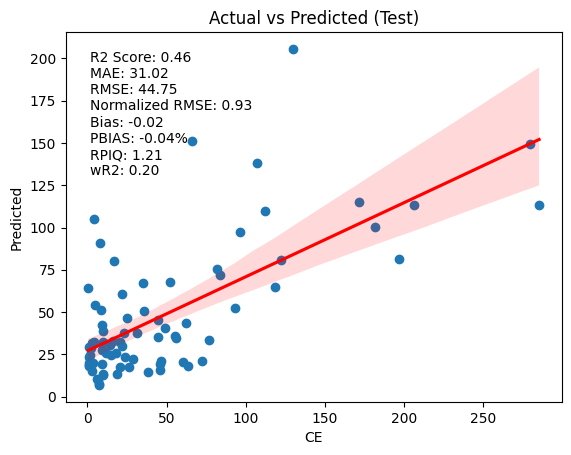

C:\Users\cespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


All data Pearson correlation: 0.9019323298111976
MAE on all data: 15.406170802792323
RMSE on all data: 25.49222072126392
Normalized RMSE on all data: 0.508874072385192
Bias on all data: 0.18114790575915968
PBIAS on all data: 0.36160628575925086


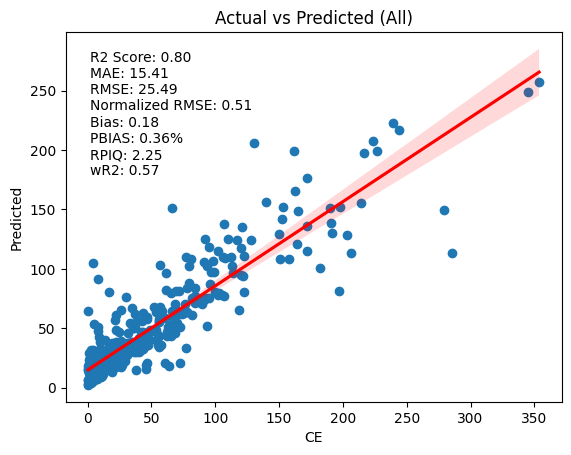

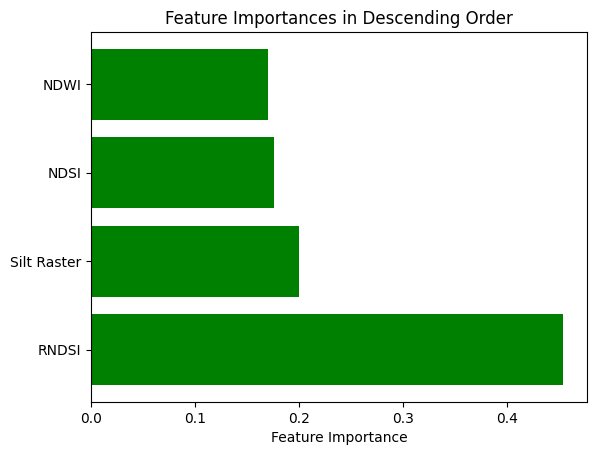

In [30]:

# Calculate RPIQ
def calculate_rpiq(y_true, y_pred):
    Q1 = np.percentile(y_true, 25)
    Q3 = np.percentile(y_true, 75)
    IQR = Q3 - Q1
    SEP = np.sqrt(np.mean((y_true - y_pred) ** 2))  # Equivalent to RMSE
    return IQR / SEP

# Obtain weighted R2 (wR2)
def calculate_wr2(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    b, _ = np.polyfit(y_true, y_pred, 1)  # Slope of the regression line
    if b <= 1:
        return abs(b) * r2
    else:
        return (1 / abs(b)) * r2

# Function to ajust the model of RandomForestRegressor
def fit_rf(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, criterion='squared_error', min_samples_split=2, random_state=42)
    model.fit(X_train, y_train.values.ravel())
    dump(model, '../Results/random_forest_model_global_CE_27_02_2025.joblib')
    return model

def predict_and_evaluate(model, X, y_true):
    y_pred = model.predict(X)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    bias = np.mean(y_pred - y_true.values.ravel())
    rmse_normalized = rmse / np.mean(y_true.values.ravel())
    pbias = 100 * np.sum(y_pred - y_true.values.ravel()) / np.sum(y_true.values.ravel())
    pearson_corr, _ = pearsonr(y_true.values.ravel(), y_pred)
    rpiq = calculate_rpiq(y_true.values.ravel(), y_pred)
    wr2 = calculate_wr2(y_true.values.ravel(), y_pred)
    return y_pred, r2, mae, rmse, rmse_normalized, bias, pbias, pearson_corr, rpiq, wr2

# Function to see the results
def plot_results(y_true, y_pred, title, r2, mae, rmse, rmse_normalized, bias, pbias, rpiq, wr2):
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(title)

    # Add regression line
    sns.regplot(x=y_true, y=y_pred, scatter=False, ax=ax, color='red')

    # Add the metrics as labels
    ax.annotate(
        f'R2 Score: {r2:.2f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nNormalized RMSE: {rmse_normalized:.2f}\nBias: {bias:.2f}\nPBIAS: {pbias:.2f}%\nRPIQ: {rpiq:.2f}\nwR2: {wr2:.2f}',
        xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top'
    )

    plt.show()

# Scale and ajust the model 
scaler = StandardScaler() 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=65)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
dump(scaler, '../DataIntermediate/scaler_27_02_2025.joblib')

# Ajust the model 
rf_model_CE = fit_rf(X_train, y_train)

# Evaliate in the test data
y_pred_test, r2_test, mae_test, rmse_test, rmse_normalized_test, bias_test, pbias_test, pearson_corr_test, rpiq_test, wr2_test = predict_and_evaluate(
    rf_model_CE, X_test, y_test
)
print('Test set Pearson correlation:', pearson_corr_test)
plot_results(y_test, y_pred_test, "Actual vs Predicted (Test)", r2_test, mae_test, rmse_test, rmse_normalized_test, bias_test, pbias_test, rpiq_test, wr2_test)

# Evaluate in the all data
X_scaled = scaler.transform(X1)
y_pred_all, r2_all, mae_all, rmse_all, rmse_normalized_all, bias_all, pbias_all, pearson_corr_all, rpiq_all, wr2_all = predict_and_evaluate(
    rf_model_CE, X_scaled, y1
)
print('All data Pearson correlation:', pearson_corr_all)
print('MAE on all data:', mae_all)
print('RMSE on all data:', rmse_all)
print('Normalized RMSE on all data:', rmse_normalized_all)
print('Bias on all data:', bias_all)
print('PBIAS on all data:', pbias_all)
plot_results(y1, y_pred_all, "Actual vs Predicted (All)", r2_all, mae_all, rmse_all, rmse_normalized_all, bias_all, pbias_all, rpiq_all, wr2_all)

# Obtatin the importances
importance_values = rf_model_CE.feature_importances_
importance_names = X1.columns

# Create a dataframe of the importances
importance_pairs = sorted(zip(importance_names, importance_values), key=lambda x: x[1], reverse=True)
importance_df = pd.DataFrame(importance_pairs, columns=['Feature', 'Importance'])

# Plot the sorted list of tuples
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Unzip the sorted list of tuples and plot the feature names and importances
for feature_name, importance in importance_pairs:
    ax.barh(feature_name, importance, color='green')

plt.xlabel("Feature Importance")
plt.title("Feature Importances in Descending Order")
plt.show()


In [22]:
print(importance_df)

       Feature  Importance
0        RNDSI    0.454235
1  Silt Raster    0.199577
2         NDSI    0.175585
3         NDWI    0.170603


In [31]:
# Save the scaler
scaler_path = '../DataIntermediate/scaler_27_02_2025.joblib'
dump(scaler, scaler_path)

# Ajuste the model mForestRegressor
rf_model_CE = fit_rf(X_train, y_train)


In [32]:
# Be sure of the mean for the Normalized RMSE and other metrics

mean_y_test = np.mean(y_test)
print('Mean', mean_y_test)


Mean 48.19294372294373


In [33]:
import pandas as pd

# Create the dataframe 'Actual', 'Predicted' y 'Tabanca_Id'
exported_xls_all_predicted = pd.DataFrame({
    'Actual': y1.values.flatten(),
    'Predicted': y_pred_all.flatten(),
    'Tabanca_Id': dataframe['Tabanca_Id'].values.flatten()  # Agregar la columna 'Tabanca_Id' del DataFrame original
})

# Show some lines of the dataframe 
exported_xls_all_predicted.head(382)

# Save the dataframe in a excel file
exported_xls_all_predicted.to_excel('../Results/Observed_Vs_Predicted_All_CE_27_02_2025.xlsx')

### 3. Apply the global model in each 'Tabanca'

C:\Users\cespe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


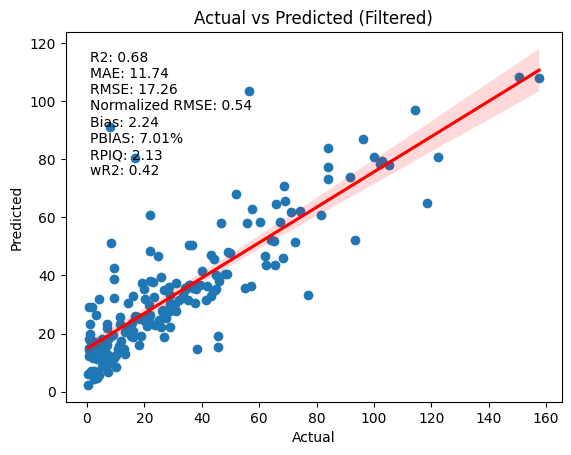

Filtered data Pearson correlation: 0.8365849710732944
MAE on filtered data: 11.739632859744994
RMSE on filtered data: 17.263656684278562
Bias on filtered data: 2.243512714025498
Normalized RMSE on filtered data: 0.5392510162386661
PBIAS on filtered data: 7.007880966981678
RPIQ on filtered data: 2.1341751252629444
wR2 on filtered data: 0.4153098402727633


In [34]:
from scipy.stats import pearsonr
from joblib import load

# Filter data by Tabanca_Id
filtered_data = dataframe[dataframe['Tabanca_Id'] == 1]  # Change this value to 1 for Cafine, 2 for Elalab, or 3 for Enchugal.

# Separate features and target variable
X1_filtered = filtered_data[['RNDSI', 'NDSI', 'NDWI','b3_1 (Silt Raster)']].dropna()
y1_filtered = filtered_data[['CE']].dropna()

# Rename columns for better clarity
X1_filtered.rename(columns={'b3_1 (Silt Raster)': 'Silt Raster'}, inplace=True)

# Ensure X1_filtered and y1_filtered share the same index
common_index = X1_filtered.index.intersection(y1_filtered.index)
X1_filtered = X1_filtered.loc[common_index]
y1_filtered = y1_filtered.loc[common_index]

# Load the saved scaler
scaler_path = '../DataIntermediate/scaler_27_02_2025.joblib'
scaler = load(scaler_path)

# Scale the filtered data
X_scaled_filtered = scaler.transform(X1_filtered)

# Load the saved RandomForest model
model_path = '../Results/random_forest_model_global_CE_27_02_2025.joblib'
rf_model_CE = load(model_path)

# Predict with the trained model
y_pred_filtered = rf_model_CE.predict(X_scaled_filtered)

# Convert DataFrame to numpy array
y1_filtered_array = y1_filtered.values.flatten()

# Function to calculate PBIAS
def calculate_pbias(y_true, y_pred):
    return 100 * np.sum(y_pred - y_true) / np.sum(y_true)

# Compute evaluation metrics
r2_filtered = r2_score(y1_filtered_array, y_pred_filtered)
mae_filtered = mean_absolute_error(y1_filtered_array, y_pred_filtered)
rmse_filtered = mean_squared_error(y1_filtered_array, y_pred_filtered, squared=False)
bias_filtered = np.mean(y_pred_filtered - y1_filtered_array)
rmse_normalized_filtered = rmse_filtered / np.mean(y1_filtered_array)
pearson_corr_filtered, _ = pearsonr(y1_filtered_array, y_pred_filtered)
pbias_filtered = calculate_pbias(y1_filtered_array, y_pred_filtered)
rpiq_filtered = calculate_rpiq(y1_filtered_array, y_pred_filtered)
wr2_filtered = calculate_wr2(y1_filtered_array, y_pred_filtered)

# Function to visualize results including metrics
def plot_results_with_metrics(y_true, y_pred, title, r2, mae, rmse, rmse_normalized, bias, pbias, rpiq, wr2):
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(title)

    # Add regression line
    sns.regplot(x=y_true, y=y_pred, scatter=False, ax=ax, color='red')

    # Annotate plot with metrics
    ax.annotate(
        f'R2: {r2:.2f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nNormalized RMSE: {rmse_normalized:.2f}\n'
        f'Bias: {bias:.2f}\nPBIAS: {pbias:.2f}%\nRPIQ: {rpiq:.2f}\nwR2: {wr2:.2f}',
        xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top'
    )

    plt.show()

# Visualize results with metrics
plot_results_with_metrics(
    y1_filtered_array, y_pred_filtered, "Actual vs Predicted (Filtered)", 
    r2_filtered, mae_filtered, rmse_filtered, rmse_normalized_filtered, 
    bias_filtered, pbias_filtered, rpiq_filtered, wr2_filtered
)

# Print evaluation metrics
print('Filtered data Pearson correlation:', pearson_corr_filtered)
print('MAE on filtered data:', mae_filtered)
print('RMSE on filtered data:', rmse_filtered)
print('Bias on filtered data:', bias_filtered)
print('Normalized RMSE on filtered data:', rmse_normalized_filtered)
print('PBIAS on filtered data:', pbias_filtered)
print('RPIQ on filtered data:', rpiq_filtered)
print('wR2 on filtered data:', wr2_filtered)

# Create DataFrame with Actual and Predicted values for export
exported_xls_Cafine_predicted = pd.DataFrame({
    'Actual': y1_filtered_array,
    'Predicted': y_pred_filtered.flatten()
})

